<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/the_evaluation_of_renal_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

324.99999999999864


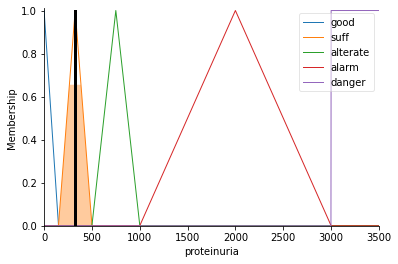

In [19]:
#the_evaluation_of_renal_function_in_post_Transplant_Patients.ipynb

#ProtFIS

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

glycaemia   = ctrl.Antecedent(np.arange(70,151,1),'glycaemia')
sirolimus   = ctrl.Antecedent(np.arange(0, 20.5, 0.5),'sirolimus')
proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe,[70,70,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[100,112,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[126,126,150,150])

sirolimus['alarm down'] = fuzz.trimf(sirolimus.universe,[0, 2.5, 5])
sirolimus['suff'] = fuzz.trimf(sirolimus.universe,[4, 5.5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe,[6, 9, 12])
sirolimus['alarm up'] = fuzz.trimf(sirolimus.universe,[11, 12.5 ,14])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe,[13, 20, 20])

proteinuria['good'] = fuzz.trimf(proteinuria.universe,[0, 0, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[150, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[1000, 2000, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[3000, 3000, 3500, 3500])

rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'] , proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'] , proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['suff'] , proteinuria['suff'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm up'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['suff'] , proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm up'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'] , proteinuria['suff'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm down'] , proteinuria['suff'])

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
proteinuria_slt = ctrl.ControlSystemSimulation(proteinuria_ctrl)
proteinuria_slt.input['glycaemia'] = 80
proteinuria_slt.input['sirolimus'] = 2
proteinuria_slt.compute()

print(proteinuria_slt.output['proteinuria'])
proteinuria.view(sim = proteinuria_slt)

22.499999999999996


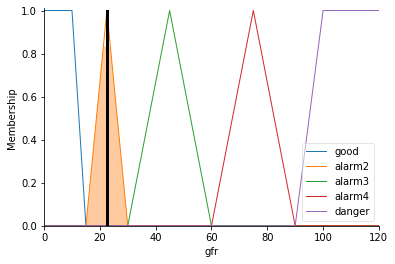

In [30]:
#GfrFis

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#For glycaemia input variable, the same membership functions of ProtFIS are used.

glycaemia   = ctrl.Antecedent(np.arange(70,151,1),'glycaemia')
cyclosporine   = ctrl.Antecedent(np.arange(0, 20.5, 0.5),'cyclosporine')
gfr = ctrl.Consequent(np.arange(0, 120.5, 0.5),'gfr')

glycaemia['good'] = fuzz.trimf(glycaemia.universe,[70,70,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[100,112,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[126,126,150,150])

cyclosporine['alarm down'] = fuzz.trimf(cyclosporine.universe,[0, 1, 2])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe,[1.5, 3.5, 5])
cyclosporine['suff'] = fuzz.trimf(cyclosporine.universe,[4, 7.5, 11])
cyclosporine['alarm up'] = fuzz.trimf(cyclosporine.universe,[8, 11.5 ,15])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe,[12, 20, 20])

gfr['good'] = fuzz.trapmf(gfr.universe,[0, 0, 10, 15])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[15, 22.5, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[30, 45, 60])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[60, 75, 90])
gfr['danger']   = fuzz.trapmf(gfr.universe,[90, 100, 120 , 120])

rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'] , gfr['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm up'] , gfr['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['suff'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'] , gfr['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'] , gfr['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'] , gfr['alarm3'])


gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
gfr_slt = ctrl.ControlSystemSimulation(gfr_ctrl)
gfr_slt.input['glycaemia'] = 110
gfr_slt.input['cyclosporine'] = 3.5
gfr_slt.compute()

print(gfr_slt.output['gfr'])
gfr.view(sim = gfr_slt)

325.0000000000007


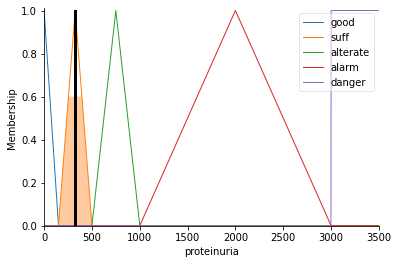

In [45]:
#ProtACE

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#For glycaemia input variable, for proteinuria and Gfr output variables, the same membership functions of case study 1 are used

glycaemia   = ctrl.Antecedent(np.arange(70,151,1),'glycaemia')
difface   = ctrl.Antecedent(np.arange(0, 10.25, 0.25),'difface')
proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')

glycaemia['good'] = fuzz.trimf(glycaemia.universe,[70,70,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[100,112,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[126,126,150,150])

difface['0'] = fuzz.trimf(difface.universe,[0, 0.5, 1.25])
difface['1'] = fuzz.trimf(difface.universe,[0.5, 1.25, 2.5])
difface['2'] = fuzz.trimf(difface.universe,[1.25, 2.5, 5])
difface['3'] = fuzz.trimf(difface.universe,[2.5, 5, 10])
difface['4'] = fuzz.trimf(difface.universe,[8.5, 10, 10 ])


proteinuria['good'] = fuzz.trimf(proteinuria.universe,[0, 0, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[150, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[500, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[1000, 2000, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[3000, 3000, 3500, 3500])

rule1 = ctrl.Rule(difface['2'] , proteinuria['suff'])
rule2 = ctrl.Rule(glycaemia['good'] & difface['1'] , proteinuria['suff'])
rule3 = ctrl.Rule(glycaemia['alarm'] & difface['1'] , proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & difface['1'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & difface['3'] , proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & difface['3'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & difface['4'] , proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & difface['0'] , proteinuria['good'])

protace_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
protace_slt = ctrl.ControlSystemSimulation(protace_ctrl)
protace_slt.input['glycaemia'] = 90
protace_slt.input['difface'] = 2
protace_slt.compute()
print(protace_slt.output['proteinuria'])
proteinuria.view(sim = protace_slt)



44.99999999999999


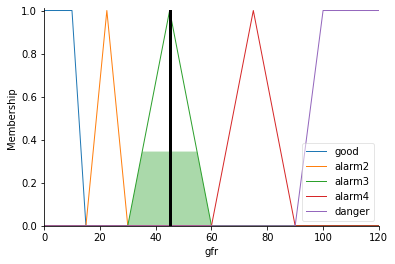

In [51]:
# GfrACE

import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

#For glycaemia input variable, for proteinuria and Gfr output variables, the same membership functions of case study 1 are used
glycaemia   = ctrl.Antecedent(np.arange(70,151,1),'glycaemia')
diffacegfr   = ctrl.Antecedent(np.arange(-10.25, 0, 0.25),'diffacegfr')
gfr = ctrl.Consequent(np.arange(0, 120.5, 0.5),'gfr')

glycaemia['good'] = fuzz.trimf(glycaemia.universe,[70,70,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[100,112,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[126,126,150,150])

diffacegfr['0'] = fuzz.trimf(diffacegfr.universe,[-1.25,-0.5,0])
diffacegfr['1'] = fuzz.trimf(diffacegfr.universe,[-2.5,-1.25,-0.5])
diffacegfr['2'] = fuzz.trimf(diffacegfr.universe,[-5,-2.5,-1.25])
diffacegfr['3'] = fuzz.trimf(diffacegfr.universe,[-10,-5,-2.5])
diffacegfr['4'] = fuzz.trimf(diffacegfr.universe,[-10,-10,-8.5])

gfr['good'] = fuzz.trapmf(gfr.universe,[0, 0, 10, 15])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[15, 22.5, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[30, 45, 60])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[60, 75, 90])
gfr['danger']   = fuzz.trapmf(gfr.universe,[90, 100, 120 , 120])

rule1 = ctrl.Rule(glycaemia['good'] & diffacegfr['2'] , gfr['alarm3'])
rule2 = ctrl.Rule(glycaemia['alarm'] & diffacegfr['2'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['good'] & diffacegfr['1'] , gfr['alarm2'])
rule4 = ctrl.Rule(glycaemia['alarm'] & diffacegfr['1'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & diffacegfr['3'] , gfr['alarm3'])
rule6 = ctrl.Rule(glycaemia['danger'] & diffacegfr['3'] , gfr['alarm4'])
rule7 = ctrl.Rule(glycaemia['good'] & diffacegfr['4'] , gfr['alarm2'])
rule8 = ctrl.Rule(glycaemia['good'] & diffacegfr['0'] , gfr['good'])
rule9 = ctrl.Rule(glycaemia['danger'] & diffacegfr['4'] , gfr['danger'])

gfrace_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
gfrace_slt = ctrl.ControlSystemSimulation(gfrace_ctrl)
gfrace_slt.input['glycaemia'] = 89  
gfrace_slt.input['diffacegfr'] = -2.5
gfrace_slt.compute()
print(gfrace_slt.output['gfr'])
gfr.view(sim = gfrace_slt)

